<a href="https://colab.research.google.com/github/ochamodev/data_science_at_work_project_final/blob/main/DS_Research_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library Imports

In [4]:
# library imports

    # data wrangling and graphs
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colormaps

    # dataset balancing
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

    # models, metrics and feature selection from sklearn

from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

  # tensorflow for DL
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import Model

# Load dataset

In [5]:
'''
Datasest found @
https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
'''

'\nDatasest found @\nhttps://www.kaggle.com/datasets/mlg-ulb/creditcardfraud\n'

In [6]:
df = pd.read_csv('/content/creditcard.csv')

# EDA -- Exploratory Data Analysis

In [7]:
df.shape

(35742, 31)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35742 entries, 0 to 35741
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    35742 non-null  int64  
 1   V1      35742 non-null  float64
 2   V2      35742 non-null  float64
 3   V3      35742 non-null  float64
 4   V4      35742 non-null  float64
 5   V5      35742 non-null  float64
 6   V6      35741 non-null  float64
 7   V7      35741 non-null  float64
 8   V8      35741 non-null  float64
 9   V9      35741 non-null  float64
 10  V10     35741 non-null  float64
 11  V11     35741 non-null  float64
 12  V12     35741 non-null  float64
 13  V13     35741 non-null  float64
 14  V14     35741 non-null  float64
 15  V15     35741 non-null  float64
 16  V16     35741 non-null  float64
 17  V17     35741 non-null  float64
 18  V18     35741 non-null  float64
 19  V19     35741 non-null  float64
 20  V20     35741 non-null  float64
 21  V21     35741 non-null  float64
 22

In [9]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [10]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,35742.000000,35742.000000,35742.000000,35742.000000,35742.000000,35742.000000,35741.000000,35741.000000,35741.000000,35741.000000,...,35741.000000,35741.000000,35741.000000,35741.000000,35741.000000,35741.000000,35741.000000,35741.000000,35741.000000,35741.000000
mean,23997.300823,-0.208427,0.072579,0.718292,0.195733,-0.216686,0.095575,-0.116847,0.032755,0.259459,...,-0.030876,-0.113555,-0.041571,0.007469,0.135958,0.021813,0.010836,0.003834,84.203356,0.002882
std,12423.654094,1.836736,1.540565,1.540896,1.409063,1.388746,1.310633,1.257788,1.242285,1.238161,...,0.769829,0.640398,0.545241,0.593343,0.435886,0.506559,0.388306,0.302016,227.279858,0.053606
min,0.000000,-30.552380,-40.978852,-31.103685,-5.172595,-42.147898,-23.496714,-26.548144,-41.484823,-7.175097,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.438650,-8.567638,-9.617915,0.000000,0.000000
25%,12283.500000,-0.960139,-0.499301,0.244741,-0.714475,-0.818199,-0.644998,-0.598057,-0.155602,-0.523422,...,-0.239644,-0.536461,-0.178485,-0.326932,-0.127310,-0.331727,-0.063200,-0.007248,6.990000,0.000000
50%,28992.000000,-0.234480,0.114024,0.827554,0.188607,-0.255034,-0.163054,-0.073069,0.043456,0.135169,...,-0.081611,-0.087516,-0.051996,0.061818,0.175722,-0.063275,0.008848,0.021087,22.000000,0.000000
75%,34258.000000,1.162263,0.755015,1.456358,1.078531,0.302991,0.485169,0.436560,0.307599,0.991696,...,0.094995,0.296665,0.076214,0.398791,0.421085,0.301153,0.086772,0.076006,76.000000,0.000000
max,38241.000000,1.960497,16.713389,4.101716,13.143668,34.099309,22.529298,36.677268,20.007208,10.392889,...,22.614889,5.805795,13.876221,4.014444,5.525093,3.517346,11.135740,5.678671,7879.420000,1.000000


In [11]:
# get nulls and NaNs
null_counts = df.isnull().sum()
nan_counts = df.isna().sum()

# display
null_nan_table = pd.DataFrame({
    'Column': df.columns,
    'Null Count': null_counts.values,
    'NaN Count': nan_counts.values
})

null_nan_table

,Column,Null Count,NaN Count
0,Time,0,0
1,V1,0,0
2,V2,0,0
3,V3,0,0
4,V4,0,0
5,V5,0,0
6,V6,1,1
7,V7,1,1
8,V8,1,1
9,V9,1,1


In [12]:
# show rows with errors
error_rows = df[df.isnull().any(axis=1)]
error_rows

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
35741,38241,-0.231062,0.243033,1.071749,-0.324598,-0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.Class.unique()

array([ 0.,  1., nan])

In [14]:
# get the percentage each category represents from the overall labels
counts = df.Class.value_counts()
percentage = (counts / len(df)) * 100
percentage

,count
Class,
0.0,99.709026
1.0,0.288176


In [15]:
counts

,count
Class,
0.0,35638
1.0,103


## Graficas

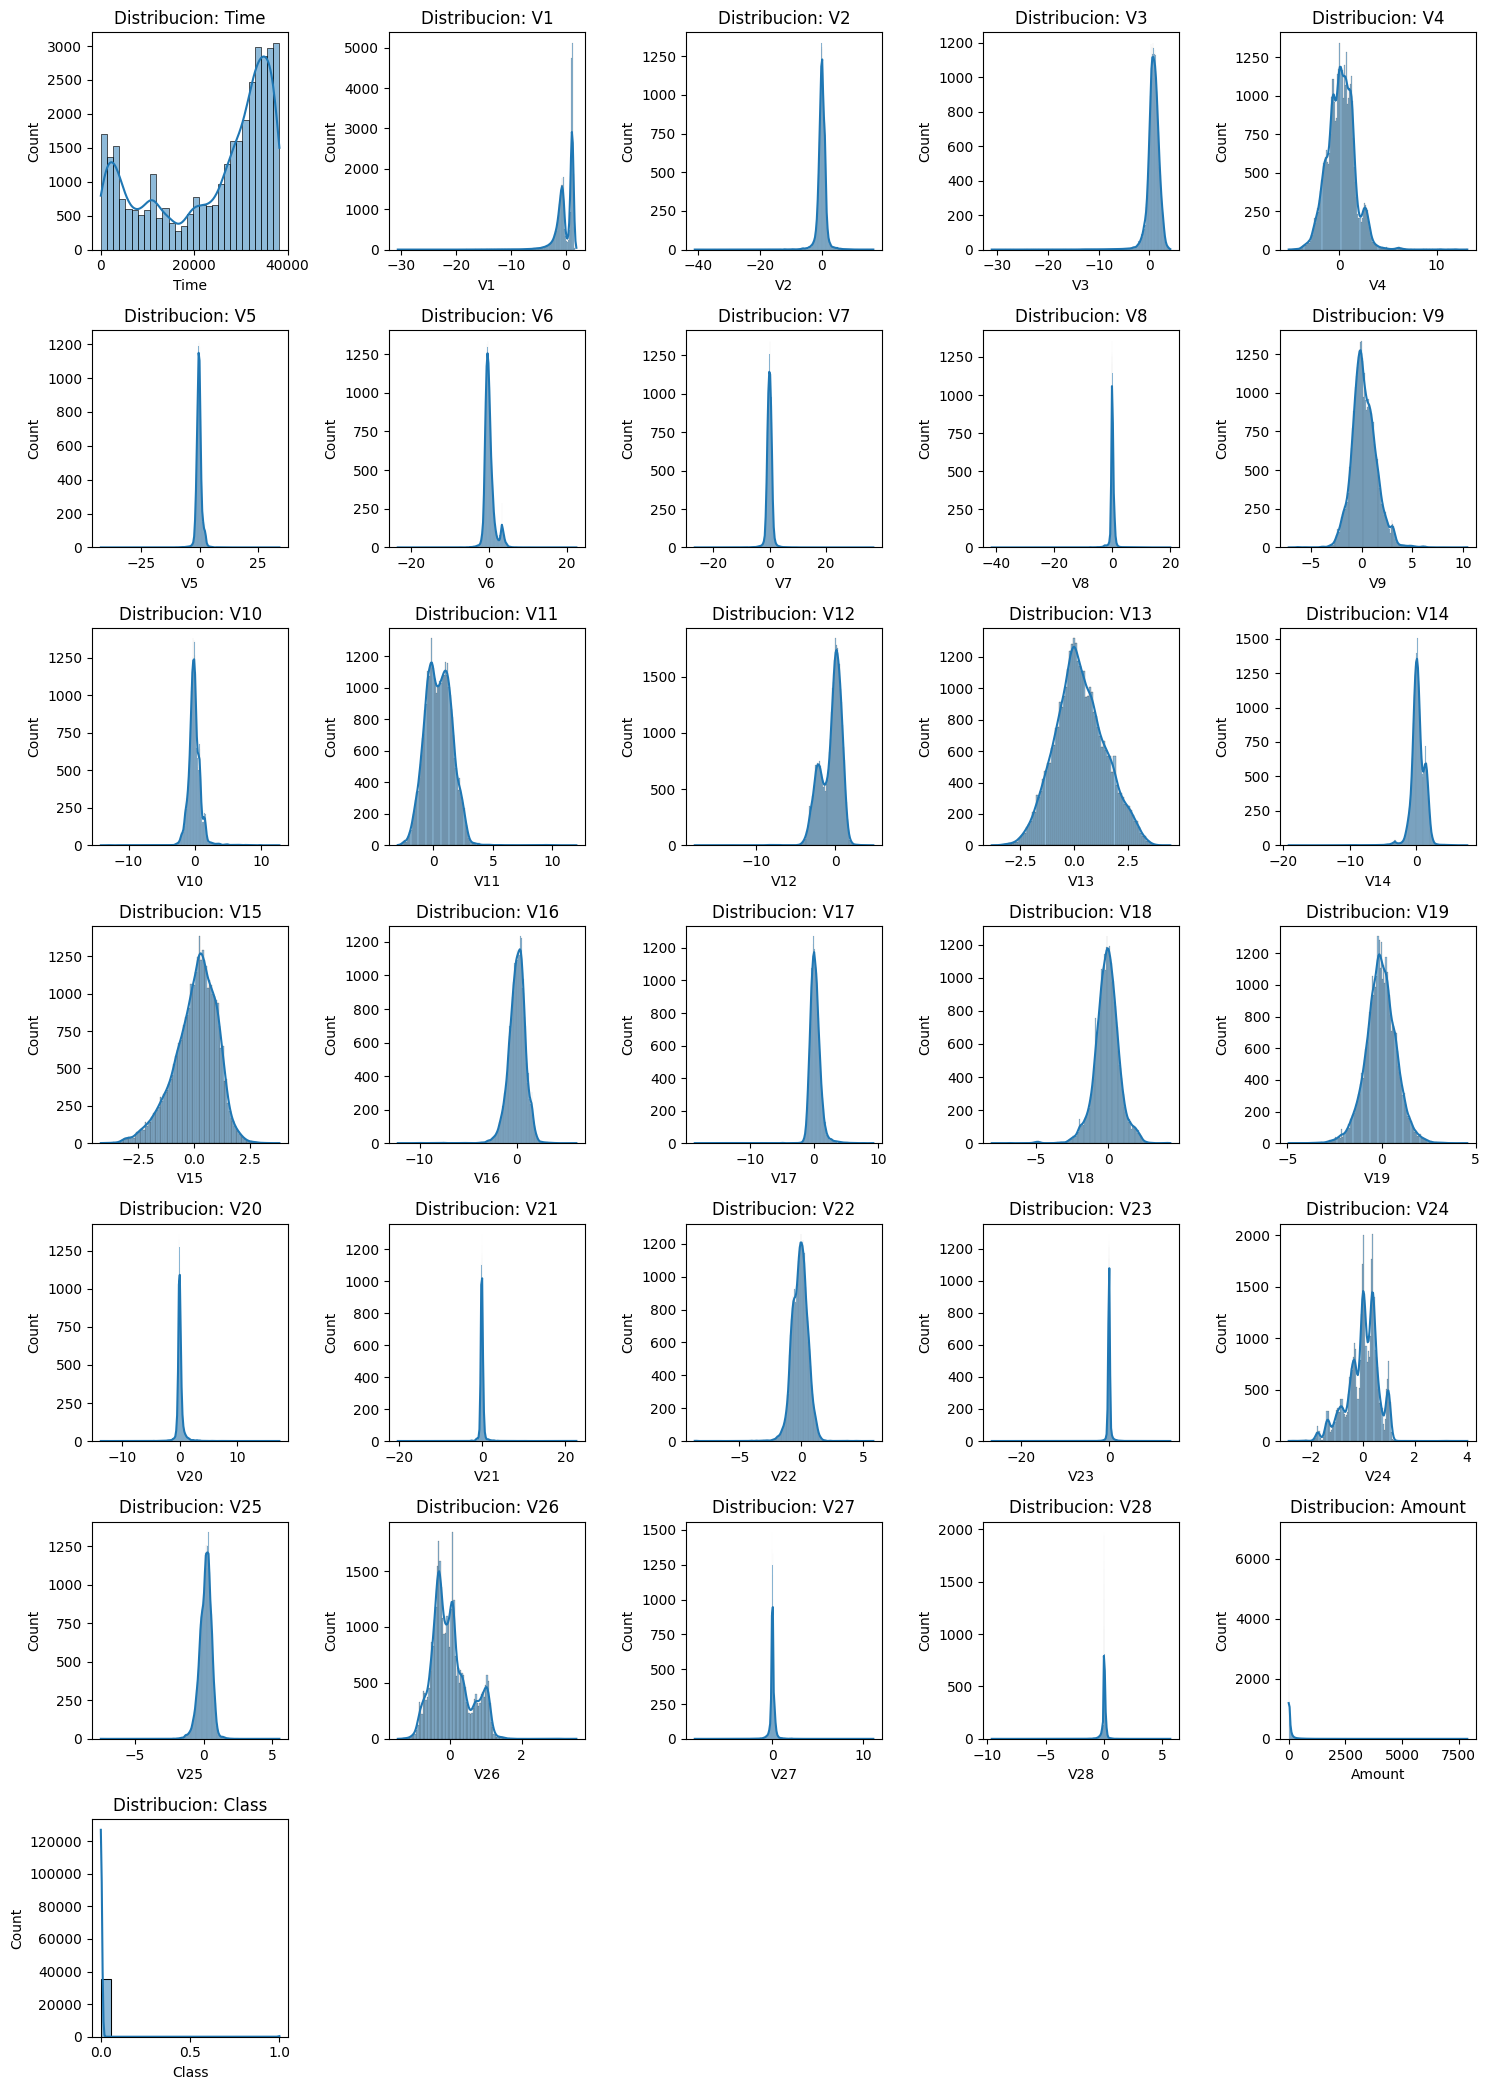

In [16]:
# convert columns to list
columns_to_graph = df.columns.tolist()
num_columns = len(columns_to_graph)

cols = 5
rows = math.ceil(num_columns / cols)

# histograms for each column
plt.figure(figsize=(15, rows * 3))
for i, col in enumerate(columns_to_graph, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribucion: {col}')
plt.tight_layout()
plt.show()

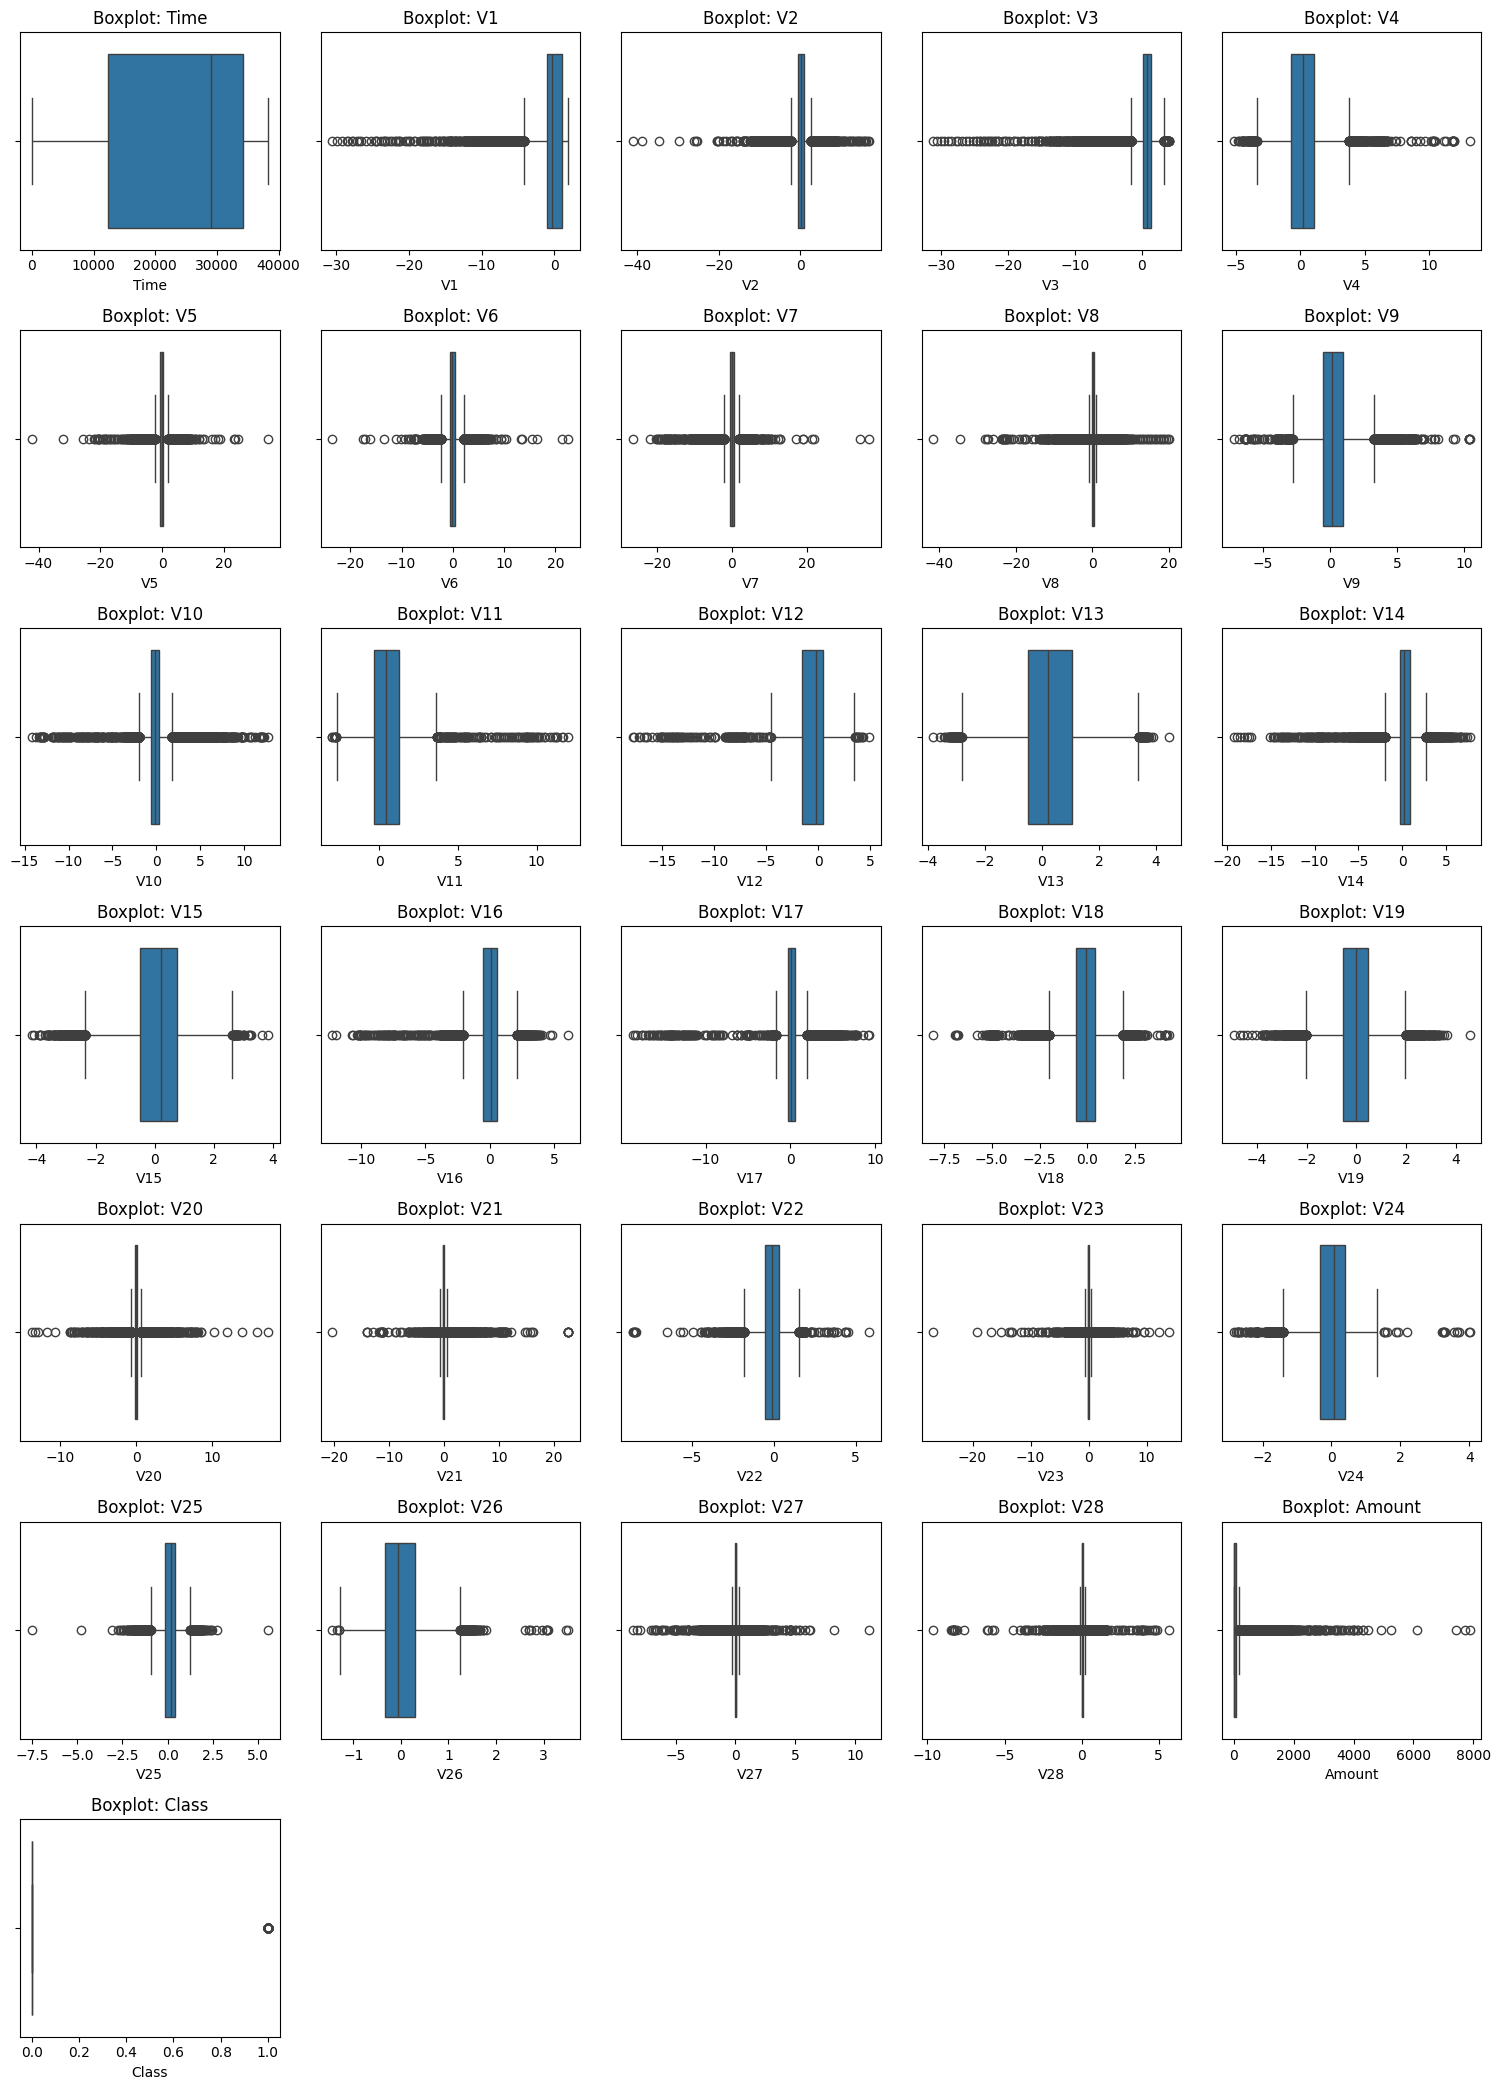

In [17]:
# boxplots to detect outliers
plt.figure(figsize=(15, rows * 3))
for i, col in enumerate(columns_to_graph, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot: {col}')
plt.tight_layout()
plt.show()

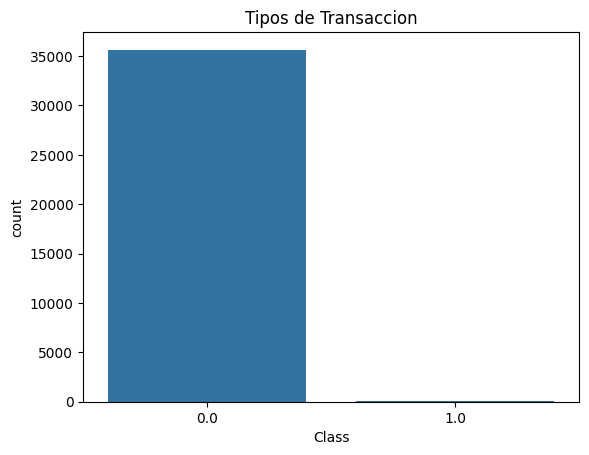

In [18]:
# distribution for fraud/non fraud
sns.countplot(x='Class', data=df)
plt.title("Tipos de Transaccion")
plt.show()

In [19]:
df_no_nans = df.dropna().copy()

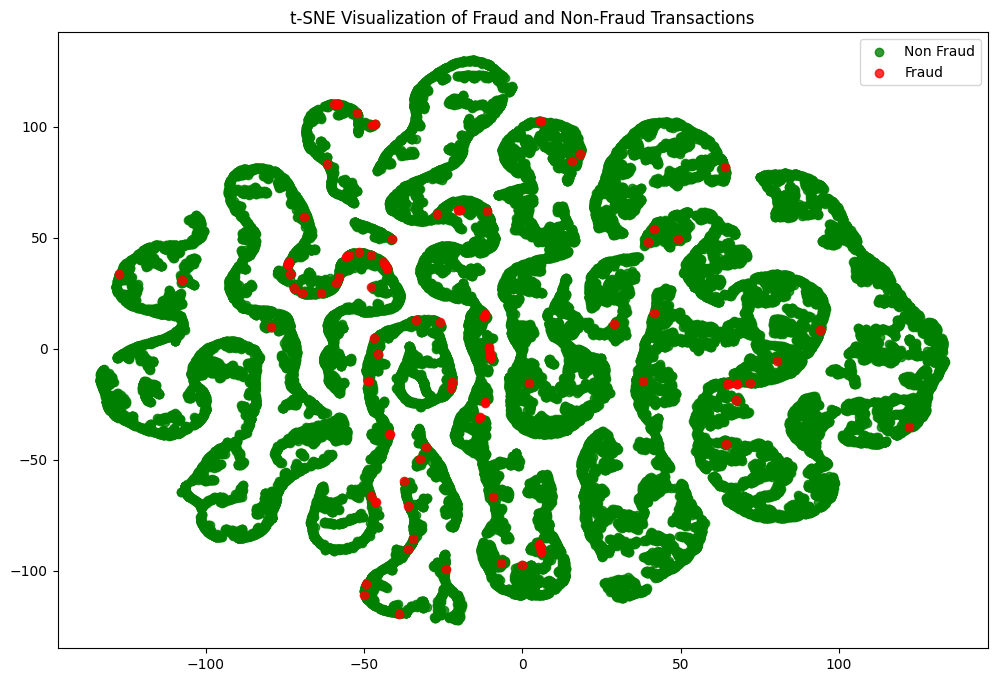

In [21]:
# t-Distributed Stochastic Neighbor Embedding to reduce dataset dimensions and produce points with max information
def tsne_plot(x1, y1):
    tsne = TSNE(n_components=2, random_state=0)
    X_t = tsne.fit_transform(x1)

    plt.figure(figsize=(12, 8))
    plt.scatter(X_t[np.where(y1 == 0), 0], X_t[np.where(y1 == 0), 1], marker='o', color='g', linewidth=1, alpha=0.8, label='Non Fraud')
    plt.scatter(X_t[np.where(y1 == 1), 0], X_t[np.where(y1 == 1), 1], marker='o', color='r', linewidth=1, alpha=0.8, label='Fraud')

    plt.legend(loc='best')
    plt.title("t-SNE Visualization of Fraud and Non-Fraud Transactions")
    plt.show()

# features (X) and target (Y)
X = df_no_nans.drop('Class', axis=1)
Y = df_no_nans['Class']

tsne_plot(X, Y)

## Correlation Matrix

<function matplotlib.pyplot.show(close=None, block=None)>

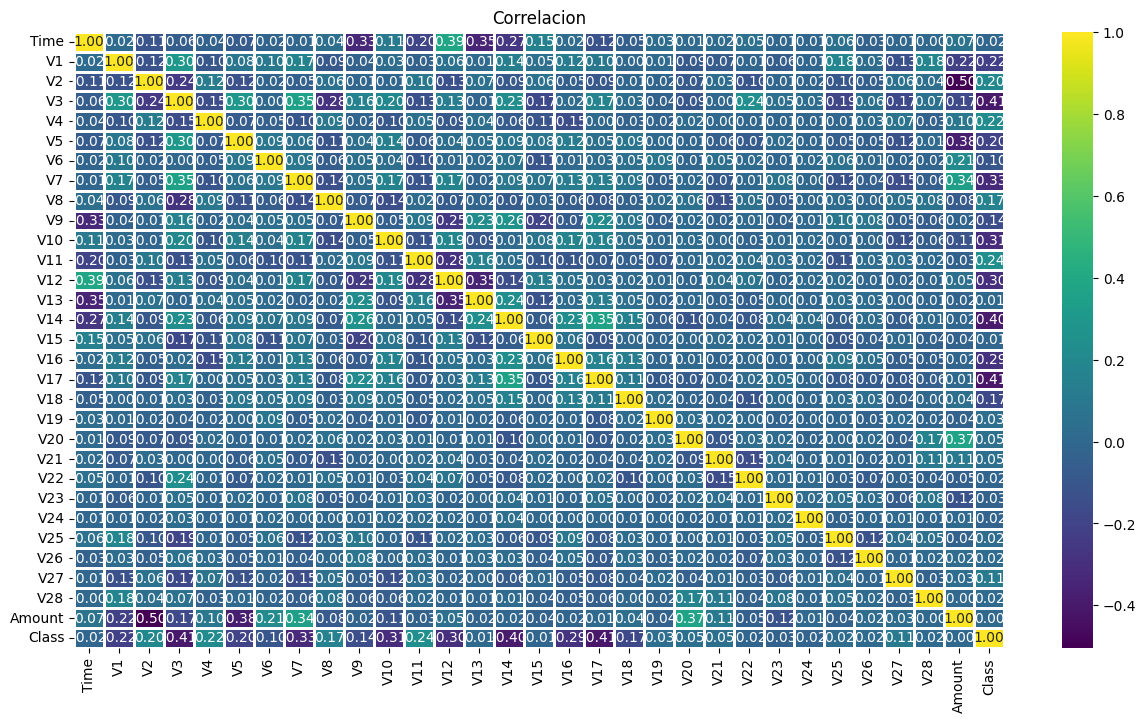

In [20]:
# corr plot
corr_matrix = df_no_nans.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, linewidths=1, cmap='viridis', annot=True, fmt='.2f')
plt.title("Correlacion")
plt.show